In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [12]:
# Importing unnormalized data from pre-processing
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_kidney")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_kidney")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_kidney")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_kidney")
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,21067003702,8.911976,44.153522,0.325386,-0.138184,-0.145729,0.248359,-1.065530,-1.220985,1.762920,0.070205
1,6089011701,7.811778,50.354122,-1.484627,1.014744,1.337599,0.332211,-1.020705,-0.051358,0.475660,-1.158869
2,53073000100,6.241130,33.216318,-0.714459,-0.246123,-0.355358,0.203886,-0.713942,1.195322,0.663606,0.547529
3,38003967900,6.537008,37.223021,-1.540636,-2.434213,-2.220009,-1.407818,0.941036,-1.366268,-0.553250,-1.375376
4,1125010803,9.284398,36.488277,-0.044625,1.613949,1.754488,-0.394209,-0.433098,-1.165083,-0.618977,0.111816


In [13]:
# Getting rid of extra column
X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)

In [14]:
print(y_test.shape, y_train.shape)

(18081, 2) (54242, 2)


In [15]:
y_test.head()

,Unnamed: 0,0
0,0,0.396919
1,1,0.044331
2,2,0.826345
3,3,-0.339305
4,4,0.508351


In [16]:
y_test.mean()

Unnamed: 0    9040.00000
0                0.00368
dtype: float64

In [17]:
# Getting rid of extra column
y_train.drop("Unnamed: 0", axis = 1, inplace=True)
y_test.drop("Unnamed: 0", axis = 1, inplace=True)

In [18]:
print(y_test.shape, y_train.shape)

(18081, 1) (54242, 1)


In [19]:
# Putting y into the correct shape for model
y_test = np.array(y_test).reshape(18081,)
y_train = np.array(y_train).reshape(54242,)
print(y_test.shape, y_train.shape)

(18081,) (54242,)


In [13]:
X_test.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
CensusTract,,,,,,,,,,
28047003204,8.719716,37.446265,0.309491,0.789024,0.894827,0.001771,-1.262888,1.961948,0.796810,0.976060
48029161302,9.291314,40.362194,-0.270060,0.048084,-0.276193,-0.494915,-1.109659,0.570057,-1.045865,-0.660464
22019000900,8.797293,34.591080,0.439319,1.178281,1.843430,0.396229,0.229363,1.266568,1.466438,0.240571
12011092000,7.981909,27.023461,0.917700,-0.636703,-0.342060,-0.034827,0.011115,1.368748,0.600303,-1.001799
42099030602,8.318497,40.925796,-1.175788,-1.022787,-1.248540,-2.107892,0.543658,-0.756794,-1.296832,-1.259557


### Multiple OLS in the EDA notebook found no reasonable correlation. 

### Random Forest Regressor

In [14]:
# Instantiating RandomForestRegressor with default parameters
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_pred = rf.predict(X_test)

In [16]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4813424916426631
MAE: 0.5151458026868379
MSE: 0.5164179849843588
RMSE: 0.7186222825548612


### Now with tuned hyperparameters via randomized search.

In [17]:
# Instantiating RandomForestRegressor and using randomized searching for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {"n_estimators": range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [18]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [19]:
rs.best_estimator_

RandomForestRegressor(max_depth=27, n_estimators=409)

In [20]:
y_pred = rs.predict(X_test)

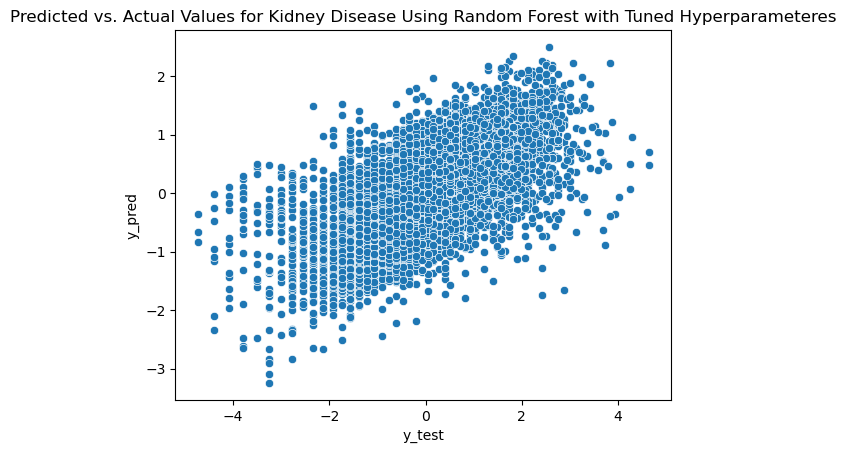

In [21]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Kidney Disease Using Random Forest with Tuned Hyperparameteres")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [22]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.48568150187300885
MAE: 0.5127337386062795
MSE: 0.5120977102676609
RMSE: 0.7156100266679198


In [23]:
# Instantiating AdaBoostRegressor with default parameters
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [24]:
y_pred = ada.predict(X_test)

In [25]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.15374008560141006
MAE: 0.6938919438427636
MSE: 0.8426058289426355
RMSE: 0.9179356344224988


### This is not as good as random forest.

### Now with tuned hyperparameters via randomized search.

In [26]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [27]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [28]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=1.001, n_estimators=405)

In [29]:
y_pred = rs.predict(X_test)

In [30]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.14738711144765448
MAE: 0.6942171240467089
MSE: 0.848931371440865
RMSE: 0.9213747182557512


### The tuning made the results slightly worse. 

### GradientBoost Regressor

In [31]:
# Instantiating GradientBoostingRegressor using default parameter
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
y_pred = gb.predict(X_test)

In [33]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.29086138100640224
MAE: 0.6175738966564971
MSE: 0.7060766127827025
RMSE: 0.8402836501936132


### Now with tuned hyperparameters via randomized search.

In [34]:
# Instantiating GradientBoostingRegressor and randomly searching for best hyperparameters n_estimators and learning rate
gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), 'learning_rate': np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [35]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [36]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=97,
                          n_estimators=436)

In [37]:
y_pred = rs.predict(X_test)

In [38]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2517285257458701
MAE: 0.637794810322349
MSE: 0.7450404953732256
RMSE: 0.8631572831026948


### This is still not as good as Random Forest.

### XGBoost Regressor

In [39]:
# Instantiating XGBRegressor with default parameters
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
y_pred = xgb.predict(X_test)

In [41]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.41192438167400036
MAE: 0.5559997334522684
MSE: 0.5855363528741395
RMSE: 0.7652034715512859


### This is still not as good as Random Forest.

### Now with tuned hyperparameters via randomized search.

In [42]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [43]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [44]:
rs.best_params_

{'min_child_weight': 146, 'max_depth': 147, 'gamma': 4}

In [45]:
y_pred = rs.predict(X_test)

In [46]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.44757840253826797
MAE: 0.5381090463041655
MSE: 0.5500362833395636
RMSE: 0.7416443105286816


### This is only slightly better than without tuning the hyperparameters. 

### LightGBM Regressor

In [47]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_l
lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [48]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [49]:
rs.best_estimator_

LGBMRegressor(reg_alpha=17.000999999999998, reg_lambda=38.00099999999999)

In [50]:
y_pred = rs.predict(X_test)

In [51]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3855129499864962
MAE: 0.5694663875764131
MSE: 0.6118337420236973
RMSE: 0.7821980197007005


This is not as good as XGBoost

In [20]:
# Importing normalized data
X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_Kidney")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_Kidney")
X_train_log.head()

,Unnamed: 0,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,0,21067003702,8.911976,44.153522,0.339782,-0.145808,-0.148408,0.240479,-1.078118,-1.472439,1.537174,0.176815
1,1,6089011701,7.811778,50.354122,-1.505100,1.016270,1.339913,0.324864,-1.028408,0.177733,0.603269,-1.218101
2,2,53073000100,6.241130,33.216318,-0.708017,-0.253320,-0.357674,0.195780,-0.692681,1.166096,0.757171,0.620596
3,3,38003967900,6.537008,37.223021,-1.563564,-2.400854,-2.210760,-1.399291,0.946528,-1.732287,-0.450612,-1.495714
4,4,1125010803,9.284398,36.488277,-0.028213,1.627263,1.759852,-0.401150,-0.392855,-1.375511,-0.532641,0.217479


In [21]:
# Getting rid of extra column
X_train_log.set_index("CensusTract", inplace=True)
X_test_log.set_index("CensusTract", inplace=True)
print(X_train_log.shape, X_test_log.shape)

(54242, 11) (18081, 11)


In [22]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.
svm = SVR()
params = {"C":np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [23]:
svm_rs.fit(X_train_log, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [24]:
svm_rs.best_estimator_

SVR(C=7.01, epsilon=2.0001)

In [25]:
y_pred_log = svm_rs.predict(X_test_log)

In [27]:
print("R2 score:", r2_score(y_test, y_pred_log))
print("MAE:", mean_absolute_error(y_test, y_pred_log))
print("MSE:", mean_squared_error(y_test, y_pred_log))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_log)))

R2 score: -0.004441909567261648
MAE: 0.7696569679187902
MSE: 1.0001048063786873
RMSE: 1.0000524018163683


### This is not as good as random forest.

## Random forest with tuned hyperparameters from randomized search gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.